# k-平均法を用いたクラスタリング

## 参考にしたサイト
https://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means

## 使用データ
https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
## 分析内容
UCバークレー大学のUCI Machine Leaning Repositoryにて公開されている，「Wholesale customers Data Set (卸売業者の顧客データ)」を利用して，顧客の購買行動を4つのクラスタに分割する．

In [29]:
# ライブラリ準備
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [30]:
# データ読み込み
cust_df = pd.read_csv("http://pythondatascience.plavox.info/wp-content/uploads/2016/05/Wholesale_customers_data.csv")
# 1，2列目を除く
del(cust_df['Channel'])
del(cust_df['Region'])
# データ確認
cust_df
# 440件の顧客の各商品の注文額

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


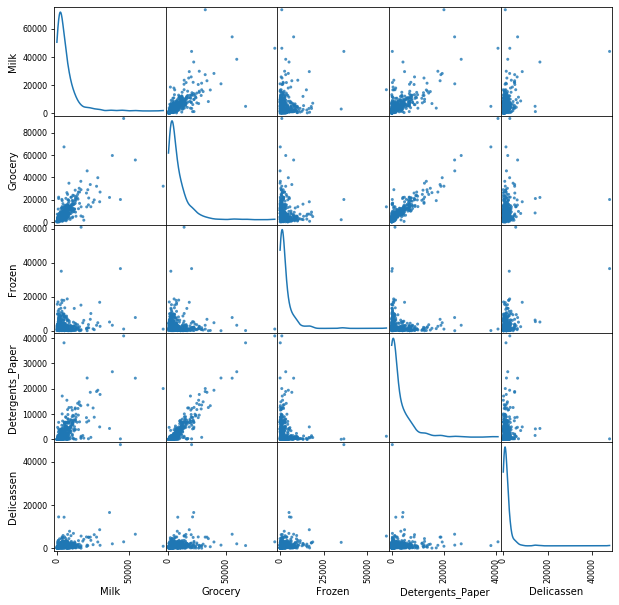

In [31]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import plotting # 高度なプロットを行うツールのインポート
plotting.scatter_matrix(cust_df[cust_df.columns[1:]], figsize=(10,10), alpha=0.8, diagonal='kde')   #全体像を眺める
plt.show()

In [32]:
cust_array = np.array([cust_df['Fresh'].tolist(),
                       cust_df['Milk'].tolist(),
                       cust_df['Grocery'].tolist(),
                       cust_df['Frozen'].tolist(),
                       cust_df['Detergents_Paper'].tolist(),
                       cust_df['Delicassen'].tolist()
                       ], np.int32)
cust_array

array([[12669,  7057,  6353, ..., 14531, 10290,  2787],
       [ 9656,  9810,  8808, ..., 15488,  1981,  1698],
       [ 7561,  9568,  7684, ..., 30243,  2232,  2510],
       [  214,  1762,  2405, ...,   437,  1038,    65],
       [ 2674,  3293,  3516, ..., 14841,   168,   477],
       [ 1338,  1776,  7844, ...,  1867,  2125,    52]])

In [33]:
# 行列を転置
cust_array = cust_array.T
cust_array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

## エルボー法（クラスター数の決定）

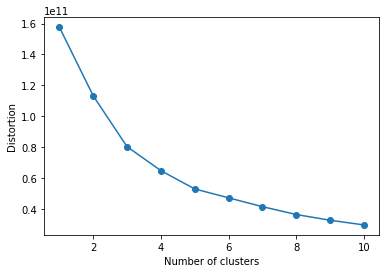

In [34]:
distortions = []

for i  in range(1,11):                # 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,
                init='k-means++',     # k-means++法によりクラスタ中心を選択
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(cust_array)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## クラスター数を固定した分析

In [38]:
clusters_num = 4
pred = KMeans(n_clusters=clusters_num).fit_predict(cust_array)
pred

array([1, 3, 1, 1, 0, 1, 1, 1, 1, 3, 3, 1, 0, 3, 0, 1, 3, 1, 1, 1, 1, 1,
       0, 2, 0, 1, 1, 1, 3, 0, 1, 1, 1, 0, 1, 3, 0, 3, 3, 0, 0, 1, 3, 3,
       1, 3, 3, 2, 1, 3, 1, 1, 0, 3, 0, 1, 3, 3, 1, 1, 1, 2, 1, 3, 1, 2,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 2, 2, 0,
       1, 0, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 0, 1, 1, 3, 3, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 3,
       0, 1, 1, 1, 1, 0, 3, 2, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 0, 3,
       1, 1, 3, 3, 0, 1, 1, 3, 1, 1, 1, 3, 1, 2, 1, 1, 3, 3, 3, 1, 3, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       3, 3, 3, 1, 3, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,

In [39]:
# Pandas のデータフレームにクラスタ番号を追加
cust_df['cluster_id']=pred
cust_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,3
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,3
438,10290,1981,2232,1038,168,2125,1


In [40]:
# 各クラスタに属するサンプル数の分布
cust_df['cluster_id'].value_counts()

1    276
3     95
0     58
2     11
Name: cluster_id, dtype: int64

In [41]:
# 各クラスタにおける平均購入額
cust_df[cust_df['cluster_id']==0].mean()
cust_df[cust_df['cluster_id']==1].mean()
cust_df[cust_df['cluster_id']==2].mean()
cust_df[cust_df['cluster_id']==3].mean()

Fresh                4808.842105
Milk                10525.010526
Grocery             16909.789474
Frozen               1462.589474
Detergents_Paper     7302.400000
Delicassen           1650.884211
cluster_id              3.000000
dtype: float64

[Text(0, 0, 'cluster0'),
 Text(0, 0, 'cluster1'),
 Text(0, 0, 'cluster2'),
 Text(0, 0, 'cluster3')]

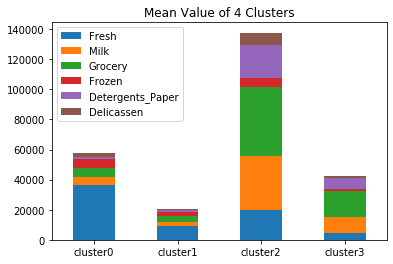

In [42]:
# 可視化（積み上げ棒グラフ）
import matplotlib.pyplot as plt
 
clusterinfo = pd.DataFrame()
for i in range(clusters_num):
    clusterinfo['cluster' + str(i)] = cust_df[cust_df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 4 Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

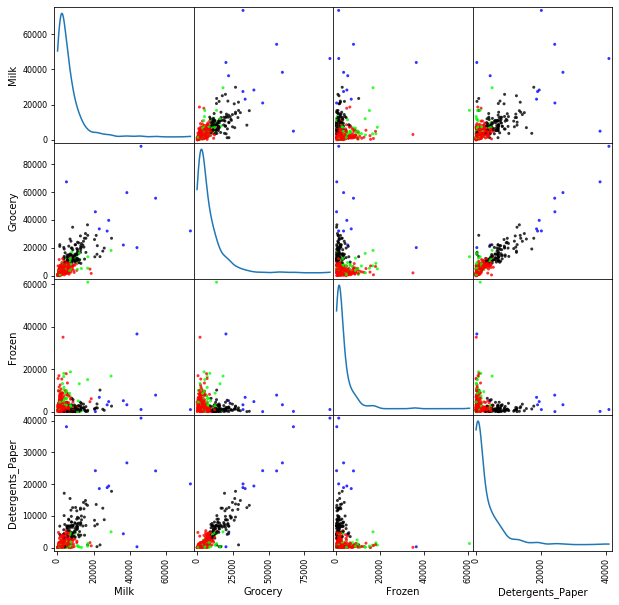

In [43]:
# 可視化（散布図）
# それぞれに与える色を決める。
color_codes = {0:'#00FF00', 1:'#FF0000', 2:'#0000FF', 3:'#000000'}
# サンプル毎に色を与える
colors = [color_codes[x] for x in cust_df['cluster_id']]
# 色分けした Scatter Matrix を描く。
plotting.scatter_matrix(cust_df[cust_df.columns[1:5]], figsize=(10,10), color=colors, alpha=0.8, diagonal='kde')   #データのプロット
plt.show()